## COMA ASAS-SN SkyPatrol Comet Ingest Pipeline

The pyasassn client allows users to query the ASAS-SN input catalog and retrieve light curves from our database. These light curves are subject to live updates as we are running continuous photometry on our nightly images.



### ASAS-SN comets

Use the client.comets catalog to enumerate ASAS-SN comets

In [19]:
#!pip install seaborn

In [20]:
import os
import seaborn as sns

from pyasassn.client import SkyPatrolClient

client = SkyPatrolClient()
client.catalogs

Welcome to ASAS-SN Skypatrol!

Current Deployment Version: 0.6.12 (30 June 2023)
Please upgrade your client if not up to date.




Table Name:  stellar_main
Num Columns: 47
Num Targets: 98932961

Table Name:  master_list
Num Columns: 4
Num Targets: 109300848

Table Name:  asassn_discoveries
Num Columns: 11
Num Targets: 5716

Table Name:  comets
Num Columns: 1
Num Targets: 13187

Table Name:  swift
Num Columns: 56
Num Targets: 254936

Table Name:  allwiseagn
Num Columns: 15
Num Targets: 1354900

Table Name:  mdwarf
Num Columns: 32
Num Targets: 8927

Table Name:  glade_tmassx
Num Columns: 20
Num Targets: 1125414

Table Name:  glade_gwgc
Num Columns: 20
Num Targets: 52399

Table Name:  m_giants
Num Columns: 12
Num Targets: 4879809

Table Name:  glade_pgc
Num Columns: 20
Num Targets: 52400

Table Name:  glade_hyperleda
Num Columns: 20
Num Targets: 2459906

Table Name:  glade_sdssqso
Num Columns: 20
Num Targets: 297152

Table Name:  milliquas
Num Columns: 21
Num Targets: 1979676

Table Name:  fermi
Num Columns: 67
Num Targets: 5788

Table Name:  aavsovsx
Num Columns: 28
Num Targets: 1437528

Table Name:  morx
Num Colu

#### Comets Catalog

The __comets__ catalog contains the comet targets that are of interest to COMA. 

In [21]:
client.catalogs.comets.head()

,col_names,dtypes
0,name,string


#### The Master List

The __master_list__ contains __asas_sn_ids__ coordinates and catalog sources for all of our targets. All of our catalogs are cross-matched on the master list with a 2-arcsecond cone. 

In [22]:
client.catalogs.master_list

,col_names,dtypes
0,asas_sn_id,bigint
1,ra_deg,double
2,dec_deg,double
3,catalog_sources,array<string>


### Random Curves 

For whatever reason, if you are interested in random targets from a given catalog, we can give you those too.

In [23]:
client.random_sample(100, catalog="comets")

,name
0,C/2012A1(PANSTARRS)MPEC2014-U12
1,C/2012K1(PANSTARRS)MPEC2014-B85
2,C/2012S1(ISON)MPC83520
3,P/2007R2(Gibbs)MPC75708
4,127P/Holt-OlmsteadMPEC2022-WQ9
...,...
95,C/2019O3(Palomar)MPEC2020-W26
96,C/2021S4(Tsuchinshan)MPEC2022-VC5
97,244P/ScottiMPEC2022-YN2
98,A/2020M4MPEC2021-R75


## Pick a comet from the list

-  417P is a periodic comet
-  C/2020K1 is a long period comet
-  P/2021L4 is a periodic comet

In [24]:
comet_regexp = 'C/2017K2.*'
#comet_regexp = '417P.*'
#comet_regexp = 'C/2020K1.*'
#comet_regexp = 'P/2021L4.*'

### ADQL Queries

We have inculded a custom ADQL parser. That will allow users to query targets using this familiar SQL-like language. 
Let's use ADQL to find all the observations of the comet we are interested in!


In [25]:
query = """
SELECT 
 name 
FROM comets
WHERE name REGEXP '%s'
"""
query = query %(comet_regexp)
client.adql_query(query)

,name
0,C/2017K2(PANSTARRS)MPC105544
1,C/2017K2(PANSTARRS)MPC106346
2,C/2017K2(PANSTARRS)MPC108595
3,C/2017K2(PANSTARRS)MPC109144
4,C/2017K2(PANSTARRS)MPC109591
...,...
62,C/2017K2(PANSTARRS)MPEC2023-FK0
63,C/2017K2(PANSTARRS)MPEC2023-G31
64,C/2017K2(PANSTARRS)MPEC2023-HD1
65,C/2017K2(PANSTARRS)MPEC2023-J29


In [26]:
lcs = client.adql_query(query, download=True, threads=8)
lcs.data.describe()

Pulled 67 of 67


,jd,flux,flux_err,mag,mag_err,limit,flux_3,flux_err_3,mag_3,mag_err_3,...,flux_7,flux_err_7,mag_7,mag_err_7,limit_7,flux_8,flux_err_8,mag_8,mag_err_8,limit_8
count,7.530000e+02,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,2.459084e+06,14.701355,0.143175,15.566781,30.578863,17.146449,23.828690,0.192167,15.154107,31.772161,...,54.042421,0.352473,14.457588,36.816470,16.101120,59.660564,0.388936,14.371022,38.409104,15.986781
std,6.096995e+02,26.419280,0.127046,2.254776,46.066722,0.894876,43.757087,0.165951,2.325303,46.554474,...,103.315159,0.278934,2.380197,48.230546,0.821662,117.292432,0.304011,2.377480,48.639394,0.812513
min,2.457903e+06,-92.433716,0.015367,11.350110,0.004751,15.205476,-210.444060,0.021724,10.814666,0.003667,...,-266.893377,0.047718,9.904664,0.002328,14.155655,-467.566697,0.053800,9.783524,0.002201,14.038125
25%,2.458636e+06,0.228754,0.053256,13.421276,0.014594,16.381345,0.267405,0.072991,12.975234,0.012153,...,0.389056,0.143686,12.400095,0.010441,15.427959,0.412987,0.159235,12.458386,0.010949,15.306452
50%,2.459062e+06,1.153919,0.084795,16.221233,0.060556,17.339267,1.556757,0.118408,15.889339,0.058693,...,2.079031,0.236515,15.470082,0.087477,16.222228,2.109207,0.268277,15.393913,0.093886,16.093985
75%,2.459666e+06,15.542324,0.203478,17.448187,99.999000,17.840345,23.438655,0.274603,17.098507,99.999000,...,39.809643,0.495677,16.292252,99.999000,16.759103,37.728709,0.547615,16.170971,99.999000,16.651385
max,2.460134e+06,104.708609,0.600988,19.186192,99.999000,19.186192,171.458757,0.809742,18.810300,99.999000,...,396.424815,1.580498,17.955936,99.999000,17.955936,443.217145,1.761191,17.825675,99.999000,17.825675


In [27]:
lcs.data.head()

,name,jd,flux,flux_err,mag,mag_err,limit,flux_3,flux_err_3,mag_3,...,flux_8,flux_err_8,mag_8,mag_err_8,limit_8,fwhm,image_id,camera,quality,phot_filter
0,C/2017K2(PANSTARRS)MPC105544,2.458029e+06,0.103202,0.044779,18.024953,99.999,18.024953,0.062255,0.065635,17.609808,...,-0.160349,0.172340,16.561678,99.999,16.561678,1.49,bq002227,bq,G,g
1,C/2017K2(PANSTARRS)MPC105544,2.458030e+06,0.017998,0.060507,17.698121,99.999,17.698121,0.190950,0.091684,17.246908,...,-0.079199,0.239187,16.205795,99.999,16.205795,1.59,bq002396,bq,G,g
2,C/2017K2(PANSTARRS)MPC105544,2.458018e+06,0.087709,0.076446,17.503969,99.999,17.503969,0.027438,0.111055,17.098507,...,0.480856,0.296662,16.031703,99.999,16.031703,1.69,ba439095,ba,B,V
3,C/2017K2(PANSTARRS)MPC105544,2.458019e+06,0.251671,0.075869,17.512198,99.999,17.512198,0.484740,0.112873,17.080880,...,1.100469,0.290327,16.055137,99.999,16.055137,1.71,ba439432,ba,G,V
4,C/2017K2(PANSTARRS)MPC105544,2.458023e+06,-0.060777,0.084409,17.396390,99.999,17.396390,-0.300948,0.129410,16.932438,...,0.000310,0.334965,15.899858,99.999,15.899858,1.79,ba440934,ba,G,V


In [28]:
lcs.data.describe()

,jd,flux,flux_err,mag,mag_err,limit,flux_3,flux_err_3,mag_3,mag_err_3,...,flux_7,flux_err_7,mag_7,mag_err_7,limit_7,flux_8,flux_err_8,mag_8,mag_err_8,limit_8
count,7.530000e+02,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,...,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,2.459084e+06,14.701355,0.143175,15.566781,30.578863,17.146449,23.828690,0.192167,15.154107,31.772161,...,54.042421,0.352473,14.457588,36.816470,16.101120,59.660564,0.388936,14.371022,38.409104,15.986781
std,6.096995e+02,26.419280,0.127046,2.254776,46.066722,0.894876,43.757087,0.165951,2.325303,46.554474,...,103.315159,0.278934,2.380197,48.230546,0.821662,117.292432,0.304011,2.377480,48.639394,0.812513
min,2.457903e+06,-92.433716,0.015367,11.350110,0.004751,15.205476,-210.444060,0.021724,10.814666,0.003667,...,-266.893377,0.047718,9.904664,0.002328,14.155655,-467.566697,0.053800,9.783524,0.002201,14.038125
25%,2.458636e+06,0.228754,0.053256,13.421276,0.014594,16.381345,0.267405,0.072991,12.975234,0.012153,...,0.389056,0.143686,12.400095,0.010441,15.427959,0.412987,0.159235,12.458386,0.010949,15.306452
50%,2.459062e+06,1.153919,0.084795,16.221233,0.060556,17.339267,1.556757,0.118408,15.889339,0.058693,...,2.079031,0.236515,15.470082,0.087477,16.222228,2.109207,0.268277,15.393913,0.093886,16.093985
75%,2.459666e+06,15.542324,0.203478,17.448187,99.999000,17.840345,23.438655,0.274603,17.098507,99.999000,...,39.809643,0.495677,16.292252,99.999000,16.759103,37.728709,0.547615,16.170971,99.999000,16.651385
max,2.460134e+06,104.708609,0.600988,19.186192,99.999000,19.186192,171.458757,0.809742,18.810300,99.999000,...,396.424815,1.580498,17.955936,99.999000,17.955936,443.217145,1.761191,17.825675,99.999000,17.825675


In [29]:
t = lcs.data['jd']
m = lcs.data['mag']

<Axes: xlabel='jd', ylabel='mag'>

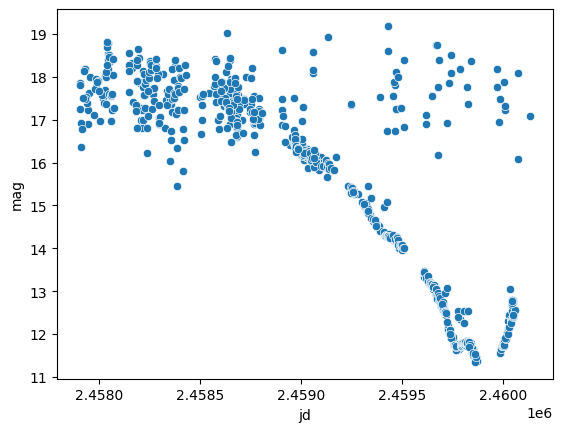

In [30]:
sns.scatterplot(data=lcs.data, x="jd", y="mag")

<Axes: xlabel='jd', ylabel='mag_err'>

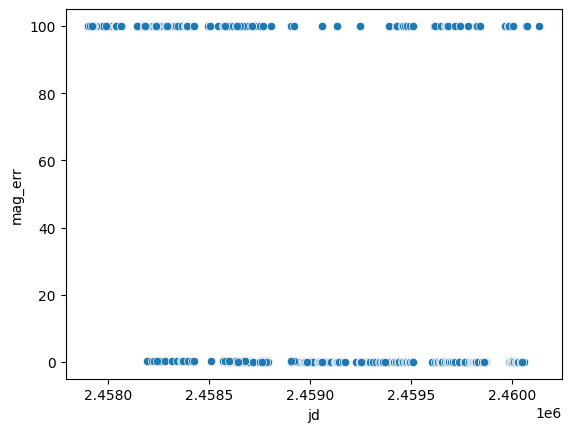

In [31]:
sns.scatterplot(data=lcs.data, x="jd", y="mag_err")

In [32]:
filtered = lcs.data[lcs.data['mag_err'] < 1] 
t = filtered['jd']
m = filtered['mag']

[Text(0.5, 1.0, 'ASAS-SN: C/2017K2')]

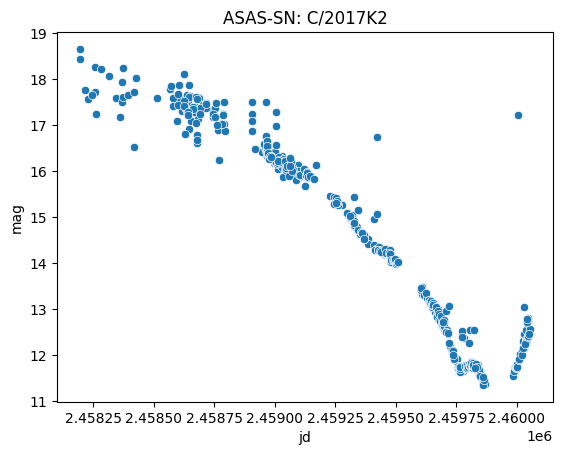

In [33]:
sns.scatterplot(data=filtered, x="jd", y="mag").set(title='ASAS-SN: C/2017K2')

#### Saving

Finally, we can save the individual light curve or the entire collection to .csv

In [34]:
lcs['C/2017K2(PANSTARRS)MPC105544']

                            name            jd      flux  flux_err        mag  \
0   C/2017K2(PANSTARRS)MPC105544  2.457943e+06  0.132054  0.132896  16.903574   
1   C/2017K2(PANSTARRS)MPC105544  2.457946e+06 -0.109289  0.097954  17.234796   
2   C/2017K2(PANSTARRS)MPC105544  2.457949e+06  0.295007  0.068918  17.616530   
3   C/2017K2(PANSTARRS)MPC105544  2.457954e+06  0.145574  0.048198  18.004789   
4   C/2017K2(PANSTARRS)MPC105544  2.457975e+06  0.097839  0.109209  17.116709   
5   C/2017K2(PANSTARRS)MPC105544  2.457978e+06  0.113764  0.062272  17.726623   
6   C/2017K2(PANSTARRS)MPC105544  2.457982e+06 -0.056776  0.050759  17.948572   
7   C/2017K2(PANSTARRS)MPC105544  2.457984e+06  0.261566  0.059805  17.770506   
8   C/2017K2(PANSTARRS)MPC105544  2.457989e+06  0.188105  0.054375  17.873860   
9   C/2017K2(PANSTARRS)MPC105544  2.457992e+06  0.058931  0.052681  17.908227   
10  C/2017K2(PANSTARRS)MPC105544  2.457997e+06  0.023975  0.065579  17.670442   
11  C/2017K2(PANSTARRS)MPC10

In [35]:
lightcurve = lcs['C/2017K2(PANSTARRS)MPC105544']
lightcurve.save(filename="c-2017-k2.parq")

c-2017-k2.parq


In [36]:
save_dir = '/data'
#print(lcs.data['name'])
lcs.data['coma_id'] = lcs.data['name'].str.replace('/', '-')
for lc in lcs.itercurves():
    lc.meta['coma_id'] = lc.meta['name'].str.replace('/', '-')
#    #lc.meta.set_index('coma_id')

lcs.id_col = 'coma_id'
for lc in lcs.itercurves():
    #lc.meta.set_index('coma_id')
    file = lc.meta[lcs.id_col].values[0]
    #file = file.replace('/','-',1)
    print(file)


/tmp/ipykernel_1294/1232548134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc.meta['coma_id'] = lc.meta['name'].str.replace('/', '-')
/tmp/ipykernel_1294/1232548134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lc.meta['coma_id'] = lc.meta['name'].str.replace('/', '-')
/tmp/ipykernel_1294/1232548134.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

KeyError: 'coma_id'

In [48]:
print(lcs.id_col)
lcs.catalog_info['coma_id'] = lcs.catalog_info['name'].str.replace('/', '-')

coma_id


In [50]:
for key, data in lcs.data.groupby(lcs.id_col):
    print(key)
    source = lcs.catalog_info[lcs.id_col] == key
    meta = lcs.catalog_info[source]

C-2017K2(PANSTARRS)MPC105544
C-2017K2(PANSTARRS)MPC106346
C-2017K2(PANSTARRS)MPC108595
C-2017K2(PANSTARRS)MPC109144
C-2017K2(PANSTARRS)MPC109591
C-2017K2(PANSTARRS)MPC110082
C-2017K2(PANSTARRS)MPC110495
C-2017K2(PANSTARRS)MPC111769
C-2017K2(PANSTARRS)MPC112391
C-2017K2(PANSTARRS)MPC118093
C-2017K2(PANSTARRS)MPC119995
C-2017K2(PANSTARRS)MPEC2017-K90
C-2017K2(PANSTARRS)MPEC2017-L52
C-2017K2(PANSTARRS)MPEC2017-M10
C-2017K2(PANSTARRS)MPEC2018-BF5
C-2017K2(PANSTARRS)MPEC2018-D91
C-2017K2(PANSTARRS)MPEC2018-HA5
C-2017K2(PANSTARRS)MPEC2020-H67
C-2017K2(PANSTARRS)MPEC2020-N31
C-2017K2(PANSTARRS)MPEC2020-R04
C-2017K2(PANSTARRS)MPEC2020-SI8
C-2017K2(PANSTARRS)MPEC2020-U96
C-2017K2(PANSTARRS)MPEC2020-UR0
C-2017K2(PANSTARRS)MPEC2020-W26
C-2017K2(PANSTARRS)MPEC2021-BE3
C-2017K2(PANSTARRS)MPEC2021-F20
C-2017K2(PANSTARRS)MPEC2021-FB5
C-2017K2(PANSTARRS)MPEC2021-J28
C-2017K2(PANSTARRS)MPEC2021-L04
C-2017K2(PANSTARRS)MPEC2021-N06
C-2017K2(PANSTARRS)MPEC2021-O56
C-2017K2(PANSTARRS)MPEC2021-P47
C-2017K2(

In [51]:
lcs.save(save_dir='/data')

/data/C-2017K2(PANSTARRS)MPC105544.parq
/data/C-2017K2(PANSTARRS)MPC106346.parq
/data/C-2017K2(PANSTARRS)MPC108595.parq
/data/C-2017K2(PANSTARRS)MPC109144.parq
/data/C-2017K2(PANSTARRS)MPC109591.parq
/data/C-2017K2(PANSTARRS)MPC110082.parq
/data/C-2017K2(PANSTARRS)MPC110495.parq
/data/C-2017K2(PANSTARRS)MPC111769.parq
/data/C-2017K2(PANSTARRS)MPC112391.parq
/data/C-2017K2(PANSTARRS)MPC118093.parq
/data/C-2017K2(PANSTARRS)MPC119995.parq
/data/C-2017K2(PANSTARRS)MPEC2017-K90.parq
/data/C-2017K2(PANSTARRS)MPEC2017-L52.parq
/data/C-2017K2(PANSTARRS)MPEC2017-M10.parq
/data/C-2017K2(PANSTARRS)MPEC2018-BF5.parq
/data/C-2017K2(PANSTARRS)MPEC2018-D91.parq
/data/C-2017K2(PANSTARRS)MPEC2018-HA5.parq
/data/C-2017K2(PANSTARRS)MPEC2020-H67.parq
/data/C-2017K2(PANSTARRS)MPEC2020-N31.parq
/data/C-2017K2(PANSTARRS)MPEC2020-R04.parq
/data/C-2017K2(PANSTARRS)MPEC2020-SI8.parq
/data/C-2017K2(PANSTARRS)MPEC2020-U96.parq
/data/C-2017K2(PANSTARRS)MPEC2020-UR0.parq
/data/C-2017K2(PANSTARRS)MPEC2020-W26.parq
/

['index.parq',
 '/data/C-2017K2(PANSTARRS)MPC105544.parq',
 '/data/C-2017K2(PANSTARRS)MPC106346.parq',
 '/data/C-2017K2(PANSTARRS)MPC108595.parq',
 '/data/C-2017K2(PANSTARRS)MPC109144.parq',
 '/data/C-2017K2(PANSTARRS)MPC109591.parq',
 '/data/C-2017K2(PANSTARRS)MPC110082.parq',
 '/data/C-2017K2(PANSTARRS)MPC110495.parq',
 '/data/C-2017K2(PANSTARRS)MPC111769.parq',
 '/data/C-2017K2(PANSTARRS)MPC112391.parq',
 '/data/C-2017K2(PANSTARRS)MPC118093.parq',
 '/data/C-2017K2(PANSTARRS)MPC119995.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2017-K90.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2017-L52.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2017-M10.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2018-BF5.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2018-D91.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2018-HA5.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2020-H67.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2020-N31.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2020-R04.parq',
 '/data/C-2017K2(PANSTARRS)MPEC2020-SI8.parq',
 '/data/C-2017K2(PANSTARRS)MPEC

In [52]:
query = """
SELECT 
 name 
FROM comets
"""

client.adql_query(query)

,name
0,100P/HartleyMPC84321
1,100P/HartleyMPEC2013-O31
2,100P/HartleyMPEC2022-D36
3,100P/HartleyMPEC2022-ED3
4,100P/HartleyMPEC2022-F14
...,...
13182,P/2023B3(PANSTARRS)MPEC2023-D72
13183,P/2023B3(PANSTARRS)MPEC2023-F81
13184,P/2023C1(Jahn)MPEC2023-FC1
13185,P/2023M1(PANSTARRS)MPEC2023-N01
